## Car price project 

Importing the libraries

In [2]:
# importing the libraries
import pandas as pd
import numpy as np

Loading the dataset

In [3]:
df = pd.read_csv('resources/data.csv')
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [4]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [5]:
nulls = df.isnull().sum()
nulls[nulls>0]

Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64

Cleaning the data

In [6]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
str_columns = df.dtypes[df.dtypes == 'object'].index.to_list()
str_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for str_column in str_columns:
    df[str_column] = df[str_column].str.replace(' ', '_').str.lower()

df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


### Exploratory data analysis

In [9]:
for column in df.columns:
    print(column)
    print(df[column].nunique())
    print(df[column].unique()[:3])
    print()

make
48
['bmw' 'audi' 'fiat']

model
914
['1_series_m' '1_series' '100']

year
28
[2011 2012 2013]

engine_fuel_type
10
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)']

engine_hp
356
[335. 300. 230.]

engine_cylinders
9
[6. 4. 5.]

transmission_type
5
['manual' 'automatic' 'automated_manual']

driven_wheels
4
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive']

number_of_doors
3
[2. 4. 3.]

market_category
71
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance']

vehicle_size
3
['compact' 'midsize' 'large']

vehicle_style
16
['coupe' 'convertible' 'sedan']

highway_mpg
59
[26 28 27]

city_mpg
69
[19 20 18]

popularity
48
[3916 3105  819]

msrp
6049
[46135 40650 36350]



Price distribution

What is most expensive car?

In [10]:
df.loc[df.msrp.idxmax()]

make                                     bugatti
model                                veyron_16.4
year                                        2008
engine_fuel_type     premium_unleaded_(required)
engine_hp                                 1001.0
engine_cylinders                            16.0
transmission_type               automated_manual
driven_wheels                    all_wheel_drive
number_of_doors                              2.0
market_category          exotic,high-performance
vehicle_size                             compact
vehicle_style                              coupe
highway_mpg                                   14
city_mpg                                       8
popularity                                   820
msrp                                     2065902
Name: 11362, dtype: object

What is the cheapest car?

In [11]:
df.loc[df.msrp.idxmin()]

make                              audi
model                              100
year                              1992
engine_fuel_type      regular_unleaded
engine_hp                        172.0
engine_cylinders                   6.0
transmission_type               manual
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                 luxury
vehicle_size                   midsize
vehicle_style                    sedan
highway_mpg                         24
city_mpg                            17
popularity                        3105
msrp                              2000
Name: 17, dtype: object

#### Note (Check distribution)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

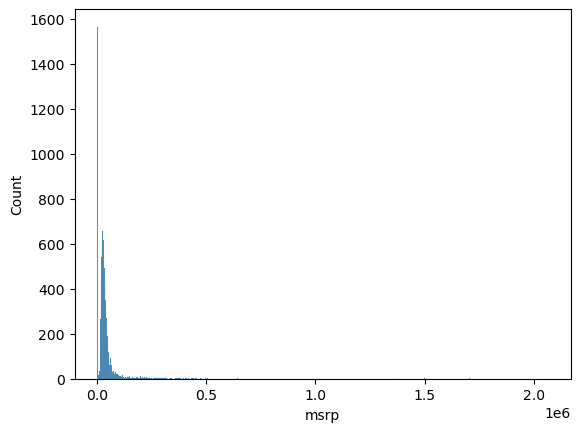

In [13]:
sns.histplot(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

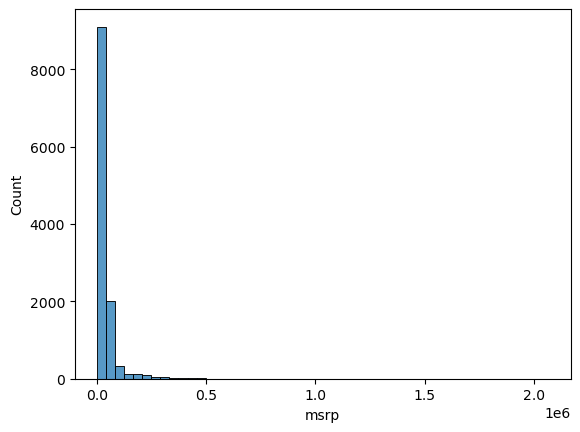

In [14]:
sns.histplot(df.msrp, bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

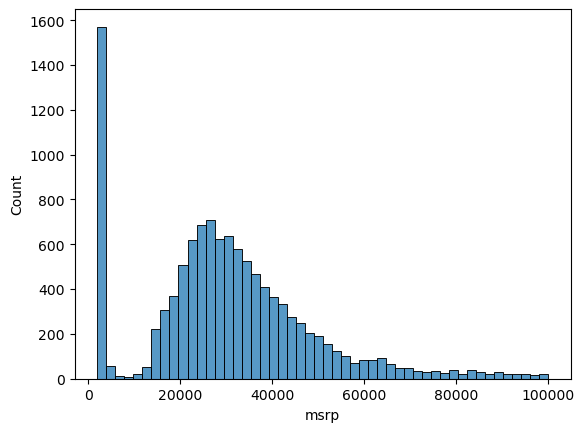

In [15]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

#### Note (Riding off _long tail_ distribution)
Notice that the distribution has a _long tail_ (check in the first and second charts) formed by a very few high prices.

This _long tail_ distribution is not good for ML and we need to rid off of it. 

The most common alternative is to compact the values using $log$.

##### Example of compacting data using log

In [16]:
data_to_compact = np.repeat([1,2,10, 10**3, 10**6], [10**2, 50, 20, 10, 3])
data_to_compact

array([      1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,     

<AxesSubplot:ylabel='Count'>

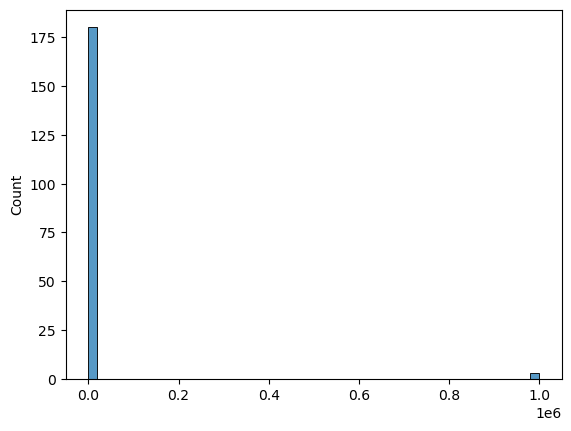

In [17]:
sns.histplot(data_to_compact, bins=50)

In [18]:
# compacting by using np.log
compacted_data = np.log(data_to_compact)
compacted_data

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

<AxesSubplot:ylabel='Count'>

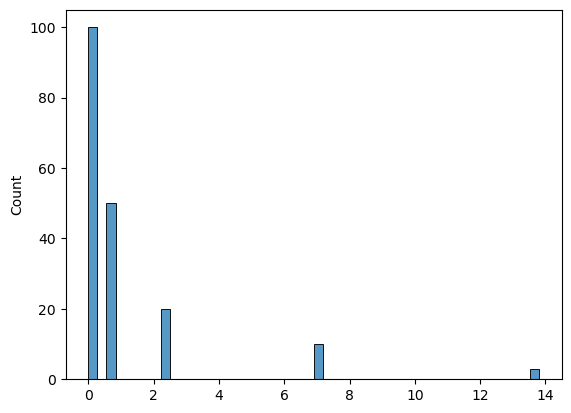

In [19]:
sns.histplot(compacted_data, bins=50)

Notice that after compacting the data the range of values is smaller and the difference proportion among the values has decreased notably.

> In some cases some of the value in list of data to compact my be $0$, in that case we need to fix the data to avoid numeric error by trying to compute the logaritmic value of $0$. Check the example below.

In [20]:
data_to_compact = np.concatenate(([0], data_to_compact))
data_to_compact

array([      0,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1,     

In [21]:
np.log(data_to_compact)

/var/folders/l4/ntzn12w91r1d8bv1rt4pswk80000gr/T/ipykernel_34256/210644704.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(data_to_compact)


array([       -inf,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

To fix the issue with zero values using `np.log` is to use `np.log1p` which add $1$ to every value in the array prior to aply $log$

In [22]:
np.log1p(data_to_compact)

array([ 0.        ,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69

> What if there is a $-1$ in the array? 

> Then $-1+1=0$... are we in the same situation again?

> The answer is _yes_ (check teh code below), so in these cases we should find another alternative (probably using some insigh of the data)

In [23]:
np.log1p(np.concatenate(([-1], data_to_compact)))

/var/folders/l4/ntzn12w91r1d8bv1rt4pswk80000gr/T/ipykernel_34256/4045520144.py:1: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(np.concatenate(([-1], data_to_compact)))


array([       -inf,  0.        ,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69

Getting back in our car price project, lets compact the msrp column

In [24]:
price_log = np.log1p(df.msrp)
(price_log.min(), price_log.max())

(7.601402334583733, 14.54107797693027)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

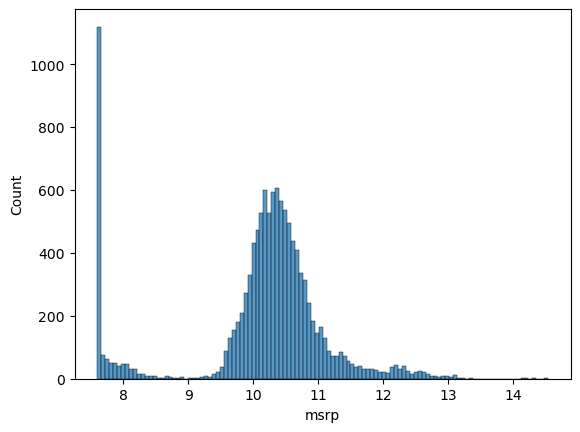

In [25]:
# Checking hte histogram again
sns.histplot(price_log)

Check in the chart above that now we have a much better distribution

#### Note (Normal distribution is good for ML)

Notice that after applying $log$ to the prices we got a chart with shape similar to normal distribution (except maybe the pick at the left). ML models with target variables with normal distribution have usually a very good performance.

### Setting up validation framework

Taking 20% for validation, another 20% for test and a 60% for training

In [26]:
n = len(df)
val_size = int(n * 0.2) # 20%
test_size = int(n * 0.2) # 20%
train_size = n - val_size - test_size
(val_size, test_size, train_size)

(2382, 2382, 7150)

Shuffling the data frame

In [27]:
np.random.seed(2)
indices = np.arange(n)
indices

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [28]:
np.random.shuffle(indices)
indices

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [29]:
df_train = df.iloc[indices[: train_size]]
df_val = df.iloc[indices[train_size : train_size+val_size]]
df_test = df.iloc[indices[train_size + val_size : ]]

In [30]:
assert len(df_train) == train_size
assert len(df_val) == val_size
assert len(df_test) == test_size

In [31]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Extracting the prices as y_train, y_val and y_test respectively and drop that columns from the sets to avoid that the model train with those features by mistake 

In [32]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Illustration least square error method to solve a non-square system of equations

In [33]:
# Just for testing illustration

X = np.random.rand(4,3)

Y = np.random.rand(4)

(X, Y)

(array([[0.34277465, 0.34981611, 0.42189025],
        [0.52122883, 0.49358956, 0.73132511],
        [0.15870901, 0.53203372, 0.12326708],
        [0.20943154, 0.29905982, 0.12439932]]),
 array([0.68755126, 0.01279864, 0.28640124, 0.58005479]))

In [34]:
# solving by least square error method
np.linalg.lstsq(X, Y)

/var/folders/l4/ntzn12w91r1d8bv1rt4pswk80000gr/T/ipykernel_34256/1276250326.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(X, Y)


(array([ 6.39637133, -0.46588976, -3.98560452]),
 array([0.16197955]),
 3,
 array([1.34163449, 0.36818539, 0.06838762]))

In [35]:
# solving manually using the same least square error method
X_gram = X.T.dot(X)
Y_gram = X.T.dot(Y)

np.linalg.solve(X_gram, Y_gram)

array([ 6.39637133, -0.46588976, -3.98560452])

### Comming back to our project 

Defining a function to build our model using normal form

In [36]:
def train_linear_regression_normal_form(X_train: np.ndarray, y_train: np.ndarray):
    ones = np.ones(X_train.shape[0])
    return np.linalg.lstsq(np.column_stack((ones, X_train)), y_train)

In [37]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [40]:
X_train = df_train.select_dtypes(include='number')
X_train

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,2008,148.0,4.0,2.0,33,24,1385
1,2012,132.0,4.0,4.0,32,25,2031
2,2016,148.0,4.0,4.0,37,28,640
3,1991,90.0,4.0,3.0,18,16,873
4,2017,385.0,8.0,4.0,21,15,5657
...,...,...,...,...,...,...,...
7145,2015,300.0,6.0,2.0,31,20,3916
7146,2015,210.0,4.0,2.0,30,24,873
7147,2015,285.0,6.0,4.0,22,17,549
7148,2014,563.0,12.0,4.0,21,13,86


In [42]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [43]:
def extract_numerical_data(df: pd.DataFrame):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    X_train = df_train[base].values
    return X_train